In [44]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [45]:
"""
Enigme 3 : la bibliothèse quantique (algorithme de Grover)
L'algorithme de Grover permet d'effectuer une recherche dans une base de données structurée ou non de façon efficace.
En effet lorsqu'on a beaucoup de donnée que l'on ne peut pas trier ou que le tri devient trop couteux,
on a d'autre choix que de parcourir les données une par une qui est de complexité O(N).
L'algorithme de Grover permet de réduire la complexité à O(sqrt(N)), néanmoins le résultat de la recherche n'est pas correct à 100% mais avec une certaine probabilité.
Il est necessaire de mettre en place une vérification sur le résultat, et dans le cas ou celui-ci est incorrect de relancer l'algorithme jusqu'à obtenir le bon résultat.
"""

"\nEnigme 3 : la bibliothèse quantique (algorithme de Grover)\nL'algorithme de Grover permet d'effectuer une recherche dans une base de données structurée ou non de façon efficace.\nEn effet lorsqu'on a beaucoup de donnée que l'on ne peut pas trier ou que le tri devient trop couteux,\non a d'autre choix que de parcourir les données une par une qui est de complexité O(N).\nL'algorithme de Grover permet de réduire la complexité à O(sqrt(N)), néanmoins le résultat de la recherche n'est pas correct à 100% mais avec une certaine probabilité.\nIl est necessaire de mettre en place une vérification sur le résultat, et dans le cas ou celui-ci est incorrect de relancer l'algorithme jusqu'à obtenir le bon résultat.\n"

In [46]:
"""
Principe de fonctionnement de l'algorithme de Grover:
- Oracle: L'oracle est une opération qui permet d'inverser la phase de l'élement recherhé qui est essentiel avant d'appliquer l'algorithme de diffusion de Grover.
- Diffusion de Grover : Le diffuseur est composé de deux étapes. La première consiste à calculer la moyenne des amplitudes de probabilités,
                        puis de prendre la symétrie par rapport à celle-ci. Ce qui a pour effet d'augmenter la probabilité de l'element identifié et de réduire celle des autres.
=> Ces deux opérations peuvent être répétées plusieurs fois jusqu'à avoir une amplitude suffisante pour l'élement recherché. En effet plus il y a de donnée, plus il faudra réitérer l'algorithme de Grover. Pour N données il est necessaire d'appliquer environ sqrt(N) fois l'opération de Grover, d'où la complexité O(sqrt(N)) car l'opération de Grover est de complexité O(1)
"""

"\nPrincipe de fonctionnement de l'algorithme de Grover:\n- Oracle: L'oracle est une opération qui permet d'inverser la phase de l'élement recherhé qui est essentiel avant d'appliquer l'algorithme de diffusion de Grover.\n- Diffusion de Grover : Le diffuseur est composé de deux étapes. La première consiste à calculer la moyenne des amplitudes de probabilités,\n                        puis de prendre la symétrie par rapport à celle-ci. Ce qui a pour effet d'augmenter la probabilité de l'element identifié et de réduire celle des autres.\n=> Ces deux opérations peuvent être répétées plusieurs fois jusqu'à avoir une amplitude suffisante pour l'élement recherché. En effet plus il y a de donnée, plus il faudra réitérer l'algorithme de Grover. Pour N données il est necessaire d'appliquer environ sqrt(N) fois l'opération de Grover, d'où la complexité O(sqrt(N)) car l'opération de Grover est de complexité O(1)\n"

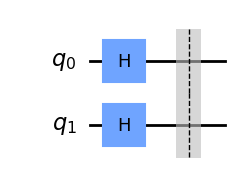

In [47]:
# Implémentation du circuit quantique
# Dans le cas de la simulation d'une base de donnée contenant 4 élements.
# On crée 2 qubits en superposition d'état pour avoir 4 états possibles en appliquant une porte H
circ = QuantumCircuit(2)
circ.h([0,1])

circ.barrier()
circ.draw('mpl')

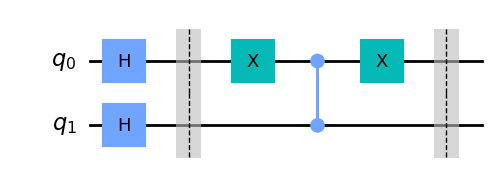

In [48]:
# Appliquer l'oracle sur l'état 10
# On a les 4 cas possibles : 00, 01, 10, 11
# On inverse la phase du 3eme elements 10 -> q1 = 1, q0 = 0
# Pour se faire, on veut inverser la phase uniquement si q0=0 et q1=1.
# La porte CZ inverse la phase uniquement du qubit cible si les deux qubits valent 1
# On doit donc inverser la valeur de q0 avec la porte not, appliquer la porte CZ car maintenant les deux qubits valent 1 pour inverser la phase de q1 puis réappliquer la porte not sur q0 pour récupérer la valeur de départ.
circ.x(0)
circ.cz(0, 1)
circ.x(0)

circ.barrier()
circ.draw('mpl')

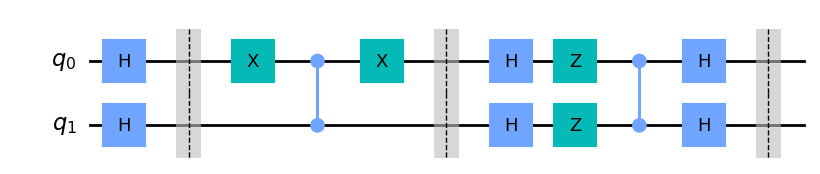

In [49]:
# On applique maintenant le diffuseur
# Celui-ci permet pour un état de créer une supperposition de tous les états mais avec la phase de l'état de départ inversé. Tous les états possibles subissent le même traitement.
# Le résultat est la somme de chaque état individuel.
circ.h([0,1])
circ.z([0,1])
circ.cz(0, 1)
circ.h([0,1])

circ.barrier()
circ.draw('mpl')

In [50]:
circ.measure_all()
# circ.measure([])
nbr_mesure = 100000

backend = Aer.get_backend('qasm_simulator')
job = backend.run(circ)
result = backend.run(transpile(circ, backend), shots=nbr_mesure).result()
counts  = result.get_counts(circ)

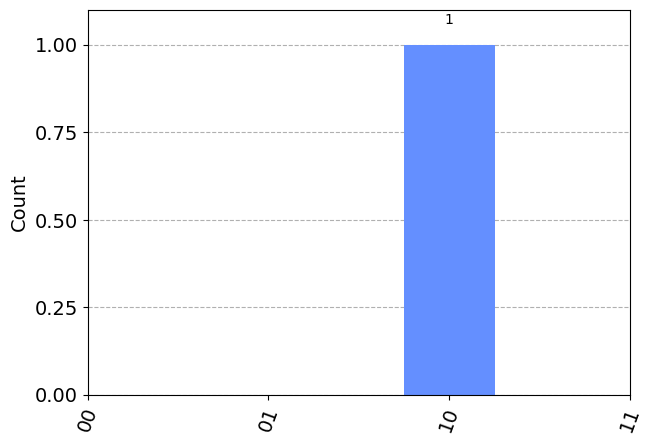

In [51]:
all_possible_states = [format(i, '0' + str(circ.num_qubits) + 'b') for i in range(2**circ.num_qubits)]

# Initialisez les probabilités à zéro pour tous les états possibles
probabilities = {state: 0 for state in all_possible_states}

# Mettez à jour les probabilités pour les états observés
for key in counts.keys():
    probabilities[key] = (counts[key])/nbr_mesure

plot_histogram(probabilities)

In [53]:
# On observe bien à la fin une probabilité de 100% d'obtenir l'élement indiqué par l'oracle (10).